# Sprint 6: Análisis estratégico de videojuegos para la tienda ICE – Proyecto Integrado Módulo 1

## Introducción:

Trabajo como analista de datos para **ICE**, una tienda online que comercializa videojuegos a nivel global. Como parte de un proyecto estratégico en diciembre de 2016, mi objetivo es identificar patrones en los datos históricos disponibles que puedan ayudar a **predecir el éxito de futuros lanzamientos** y a **planificar campañas publicitarias más efectivas para 2017**.

Para ello, trabajaré con un conjunto de datos que incluye información sobre las ventas globales de videojuegos, sus géneros, plataformas, calificaciones de usuarios y expertos, así como su clasificación ESRB. A lo largo de este análisis:

- Prepararé y limpiaré los datos para asegurar su calidad.
- Analizaré tendencias de ventas por plataforma, género y región.
- Estudiaré el impacto de las reseñas y calificaciones en el desempeño comercial.
- Elaboraré perfiles de usuario para distintas regiones del mundo.
- Finalmente, **probaré hipótesis estadísticas** que ayudarán a validar o rechazar supuestos sobre preferencias del mercado.

Este análisis no solo permitirá encontrar oportunidades de negocio, sino que también desarrollará criterios para **detectar títulos prometedores** y **tomar decisiones informadas en campañas de marketing**.

In [56]:
# cargar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
# cargar dataset 
games = pd.read_csv("/datasets/games.csv")

In [3]:
# info general del data set 

print(games.info())

print 

print(games.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2 

## Procesamiento y Preparación de datos

In [4]:
# cambiar los nombres de las columnas a minusculas 
games.columns = games.columns.str.lower()
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [ ]:
# convertir los tipos de datos necesarios 


# Para year_of_release:
# Rellenamos valores faltantes con 0 para indicar que no hay un año de lanzamiento disponible,
# y convertimos la columna a int, ya que los años deben representarse como valores enteros.
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

# Reemplazamos 'tbd' (to be defined) por None, ya que representa datos aún no definidos.
# Esto nos permite tratar estos valores como datos faltantes (NaN) en el análisis,
# facilitando cálculos estadísticos y evitando errores al convertir la columna a tipo numérico.
games['user_score'] = games['user_score'].replace('tbd', None).astype(float)

# Para critic_score:
# lo psamos a float y mantenemos la info faltante como none 
# y convertimos la columna a int para facilitar cálculos y análisis como puntaje entero.
games['critic_score'] = games['critic_score'].astype(float)


print(games.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Decidí dejar user_score como float para mantener el nivel de presición
si más adelante lo necesito podria esaclarlo y ponerlo en int como critic score si hay que compararlos directamente 
o poner esa conversión en ontra col, pero de momento así funcionan bien
Aunado a que es un columna con muchos nulls, esto pude deberse a un tema de origen de los datos en los que no todos los juegos tienen criticas de los usuarios simplemente porque los usuarios no dejaron un score.

In [ ]:
# revisar los nulos 
null_counts = games.isnull().sum()
print(null_counts)

print()

#caso con nulos en el nombre y genre
null_name_genre = games[games['name'].isnull() | games['genre'].isnull()]
print(null_name_genre)

# Eliminar filas con valores nulos en 'name' o 'genre'
# No contienen suficiente información para contribuir significativamente 
# al análisis y mantenerlas solo añadiría ruido al dataset.
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)

print()
# los demas casos

critic_score_nulls = games[games['critic_score'].isnull()].sample(5)
print(critic_score_nulls)

print()
print()

user_score_nulls = games[games['user_score'].isnull()].sample(5)
print(user_score_nulls)

print()
print()

rating_nulls = games[games['rating'].isnull()].sample(5)
print(rating_nulls)

print()
print()

all_nulls = games[
    games['critic_score'].isnull() & 
    games['user_score'].isnull() & 
    games['rating'].isnull()
].sample(5)
print(all_nulls)



name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         7953
rating             6764
dtype: int64

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

                             name platform  year_of_release       genre  \
10784                Man vs. Wild     X360             2011      Action   
4098         All-Star Baseball 99      N64             1998      Sports   
9312     Imagine: Fashion Stylist       DS             2010  Simulation   
15335  Tengen Toppa Gurren-Lagann       DS             2007      Action   
2574     Capcom's Soccer Shootout     SNES             1993      Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
10784      0.09      0.00      0.00    

Observamos que las columnas 'critic_score', 'user_score' y 'rating' tienen valores nulos 
distribuidos sin un patrón claro entre plataformas, géneros o años de lanzamiento. 
Dado que más del 50% de los datos faltan en algunas de estas columnas, imputarlos 
con la media o mediana podría introducir sesgos significativos. 
Por ahora, dejamos los valores como NaN para evitar alterar el dataset. 
Si se requiere un análisis específico de estas columnas, trabajaremos con un subset 
que ignore las filas con nulos en las columnas correspondientes.

In [ ]:
# revisar duplicados explicitos 

# Encontrar filas duplicadas
duplicados = games[games.duplicated()]

# Mostrar las filas duplicadas
print(duplicados)

# parece que no hay duplicados explicitos

#revisar duplicados implicitos 

# Normalizar nombres eliminando espacios extras y convirtiendo a minúsculas
games['name_clean'] = games['name'].str.strip().str.lower()

# Buscar posibles duplicados en 'name_clean'
duplicados_implicitos = games[games.duplicated(subset=['name_clean'], keep=False)]

# Mostrar los duplicados implícitos encontrados
print(duplicados_implicitos[['name', 'name_clean', 'platform', 'year_of_release']])


print()
print()


duplicados_implicitos = games[games.duplicated(subset=['name_clean'], keep=False)]
print(duplicados_implicitos.head(10))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []
                                                   name  \
1                                     Super Mario Bros.   
5                                                Tetris   
16                                   Grand Theft Auto V   
17                        Grand Theft Auto: San Andreas   
18                                    Super Mario World   
...                                                 ...   
16704                     Men in Black II: Alien Escape   
16707  SCORE International Baja 1000: The Official Game   
16708                     Samurai Warriors: Sanada Maru   
16711                                  Spirits & Spells   
16712                               Winning Post 8 2016   

                                             name_clean platform  \
1                                     super mario bros.      NES   
5 

Parece que los duplicados implicitos se deben principalmente al lanzamiento de juegos en distintas plataformas y años.
No hace falta eliminarlos

In [20]:
# crear la columna total_sales

# Calcular las ventas totales sumando las ventas por región
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Verificar el resultado
print(games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())

print()
print()

print(games.info())

print()
print()

print(games.sample(15))

print()
print()

# Filtrar juegos con ventas totales mayores a 1 millón
high_sales = games[games['total_sales'] > 1]

# Tomar una muestra de 5 juegos con ventas altas
high_sales_sample = high_sales.sample(5)

# Mostrar la muestra
print(high_sales_sample)

                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales       

## Análisis de datos

In [21]:
# vistazo al estado actual 
print(games.info())

print()

print(games.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           9949 non-null   object 
 11  name_clean       16713 non-null  object 
 12  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.7+ MB
None

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             200

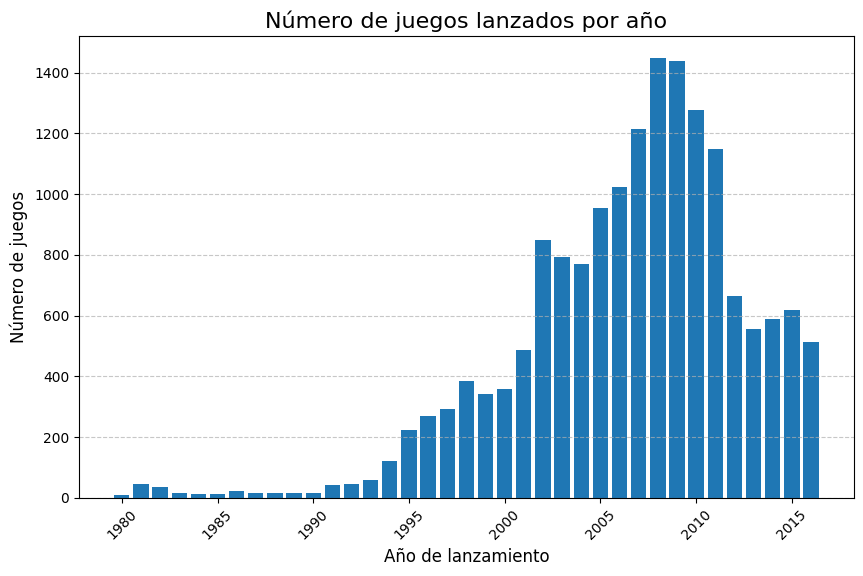



[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, name_clean, total_sales]
Index: []


year_of_release
1980       9
1981      47
1982      37
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      44
1993      60
1994     121
1995     222
1996     268
1997     294
1998     386
1999     342
2000     358
2001     488
2002     849
2003     793
2004     770
2005     954
2006    1025
2007    1215
2008    1449
2009    1440
2010    1278
2011    1149
2012     666
2013     555
2014     590
2015     619
2016     514
Name: name, dtype: int64


In [ ]:
# Juegos lanzados por año 

# Contar juegos por año de lanzamiento
games_per_year = games['year_of_release'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.title('Número de juegos lanzados por año', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Número de juegos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print()
print()

# Ver los valores únicos de la columna year_of_release
unique_years = games['year_of_release'].unique()
print(sorted(unique_years))

print()
print()


# Filtrar registros con year_of_release igual a 0
invalid_years = games[games['year_of_release'] == 0]
print(invalid_years)

# Reemplazar valores 0 con NaN en year_of_release
games['year_of_release'] = games['year_of_release'].replace(0, None)

valid_years = games[games['year_of_release'] > 0]


print()
print()

# Filtrar años válidos (excluir year_of_release == 0 si es necesario)
valid_years = games[games['year_of_release'] > 0]

# Agrupar por año y contar los juegos
games_per_year_grouped = valid_years.groupby('year_of_release')['name'].count()

# Mostrar los resultados
print(games_per_year_grouped)



Análisis de tendencia:
Observamos un aumento constante en el número de juegos lanzados a partir de los años 1990, 
con un crecimiento más pronunciado entre 2000 y 2008, alcanzando un pico en 2008 con 1,449 juegos. 
Después de 2008, la tendencia muestra un descenso gradual en los lanzamientos, posiblemente debido a 
factores como cambios en la industria, el aumento de juegos móviles no registrados en este dataset, 
o la transición hacia otras plataformas y modelos de negocio.
Los datos antes de 1994 muestran un número significativamente menor de lanzamientos, lo cual podría 
reflejar los inicios de la industria o la falta de registros exhaustivos de esos períodos. 
En general, los datos posteriores a 1994 son más representativos y confiables para analizar tendencias.

In [33]:
# Observar cómo varían las ventas de una plataforma a otra

# Agrupar por plataforma y calcular las ventas totales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas con mayores ventas
print(platform_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


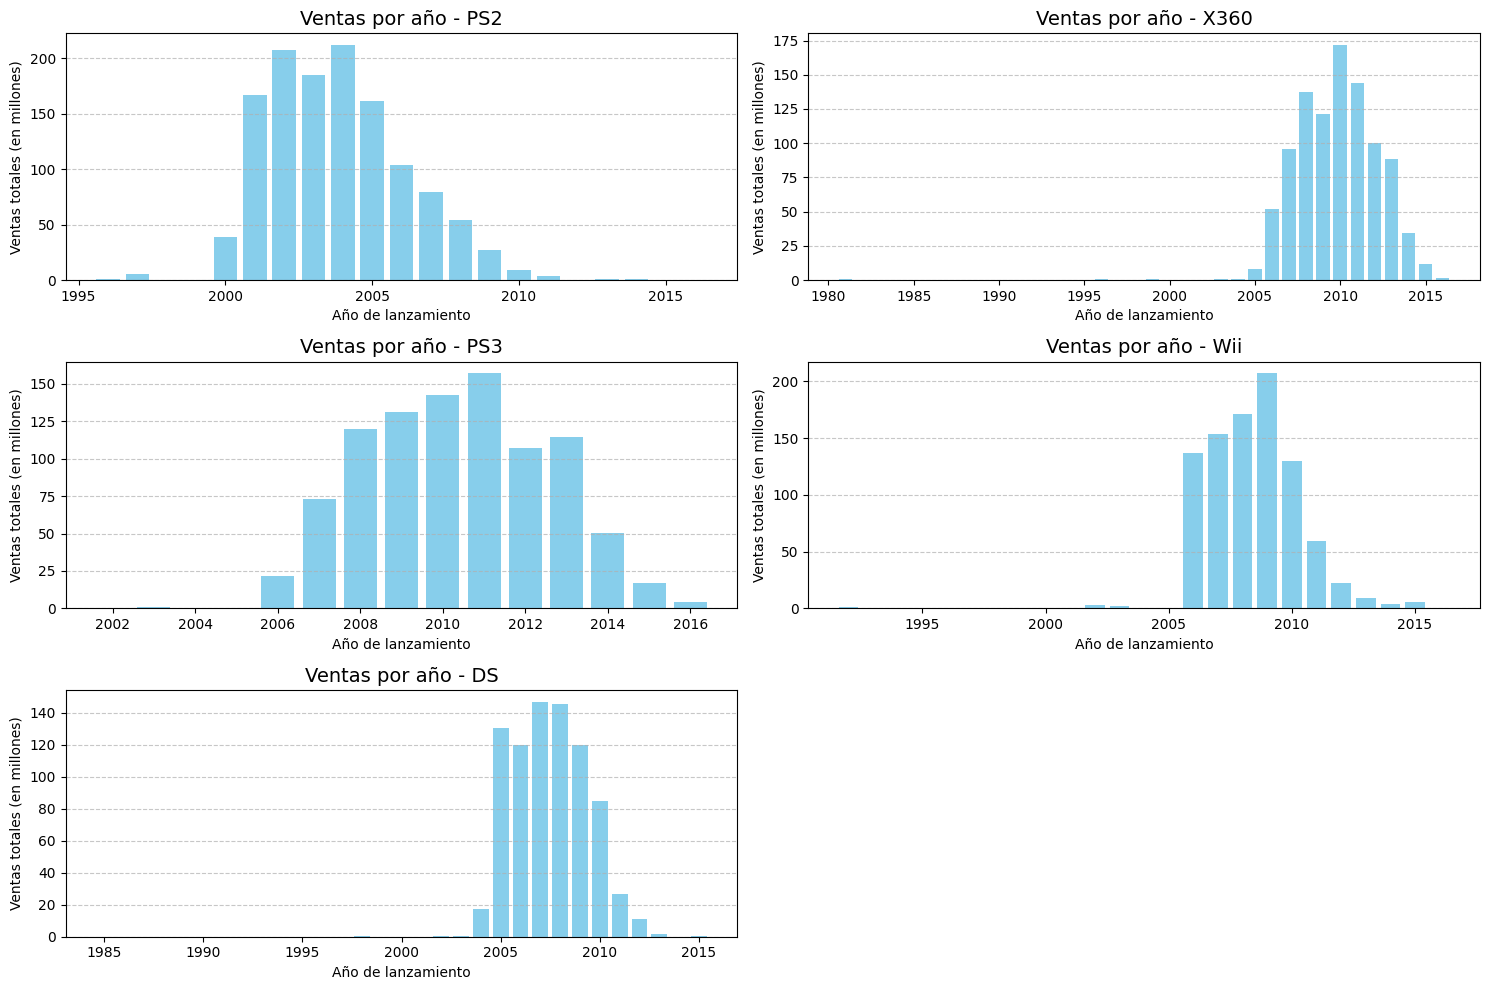



platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
1981               0.00    0.00    0.00    0.00    0.97
1985               0.02    0.00    0.00    0.00    0.00
1992               0.00    0.00    0.00    1.23    0.00
1995               0.00    0.00    0.00    0.00    0.38
1996               0.00    0.56    0.00    0.23    0.50
1997               0.00    5.24    0.00    0.00    0.00
1998               0.33    0.00    0.00    0.27    0.18
1999               0.00    0.00    0.00    0.16    0.81
2000               0.10   39.17    0.00    0.47    0.00
2001               0.07  166.43    0.00    0.10    0.00
2002               0.39  207.41    0.21    3.07    0.15
2003               0.18  184.92    1.01    2.13    0.78
2004              17.40  211.81    0.00    0.47    0.84
2005             130.86  161.73    0.42    0.22    8.32
2006             119.98  103.71   21.83  137.15   51.62
2007             147.00   78.99   73.19  153.3

In [ ]:
# Seleccionar las principales plataformas (top 5)
top_platforms = platform_sales.head(5).index

# Filtrar los datos para estas plataformas
top_platforms_data = games[games['platform'].isin(top_platforms)]

# Graficar ventas por año para cada plataforma
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, platform in enumerate(top_platforms, 1):
    # Filtrar datos de la plataforma actual
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    
    # Agrupar por año y sumar ventas
    sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    
    # Crear subgráfico
    plt.subplot(3, 2, i)
    plt.bar(sales_by_year.index, sales_by_year.values, color='skyblue')
    plt.title(f'Ventas por año - {platform}', fontsize=14)
    plt.xlabel('Año de lanzamiento', fontsize=10)
    plt.ylabel('Ventas totales (en millones)', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print()
print()

# Seleccionar las 5 plataformas principales por ventas totales
top_platforms = platform_sales.head(5).index

# Filtrar los datos para las plataformas principales
top_platforms_data = games[games['platform'].isin(top_platforms)]

# Crear una tabla dinámica de ventas totales por año y por plataforma
sales_pivot_top5 = top_platforms_data.pivot_table(
    index='year_of_release',  # Filas: Año de lanzamiento
    columns='platform',       # Columnas: Plataforma
    values='total_sales',     # Valores: Ventas totales
    aggfunc='sum',            # Función de agregación: Suma
    fill_value=0              # Rellenar valores faltantes con 0
)

# Mostrar la tabla dinámica
print(sales_pivot_top5)

Con estas primeras observaciones podemos ver que hay datos que no hacen sentido
ya que son previos al año de lanzamiento de las consolas. 
dado que no son tan significativos optare por filtrar el dataset con los años que hagan sentido
ya que una correción manual podria ser muy laborioso y poco frictifero. 

In [39]:
#correción de los años de lanzamiento de las consolas 
# y retomamos análisis

# Fechas oficiales de lanzamiento y fin de vida útil de las plataformas
platform_lifespans = {
    'DS': (2004, 2016),
    'PS2': (2000, 2013),
    'PS3': (2006, 2016),
    'Wii': (2006, 2013),
    'X360': (2005, 2016)
}

def filter_platform_data(row):
    platform = row['platform']
    year = row['year_of_release']
    # Verificar si la plataforma tiene un período definido
    if platform in platform_lifespans:
        start, end = platform_lifespans[platform]
        return start <= year <= end
    return False  # Si no hay período definido, descartar

# Filtrar datos relevantes basados en los períodos de vida de las plataformas
filtered_games = games[games.apply(filter_platform_data, axis=1)]

# Verificar los datos actualizados
print(filtered_games.head())
print(filtered_games['platform'].value_counts())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

              name_clean  total_sales  
0             wii sports        82.54  
2         mario kart wii        35.52  
3      w

Top 5 plataformas con mayores ventas:
 platform
PS2     1248.68
X360     966.81
PS3      938.01
Wii      889.93
DS       805.03
Name: total_sales, dtype: float64




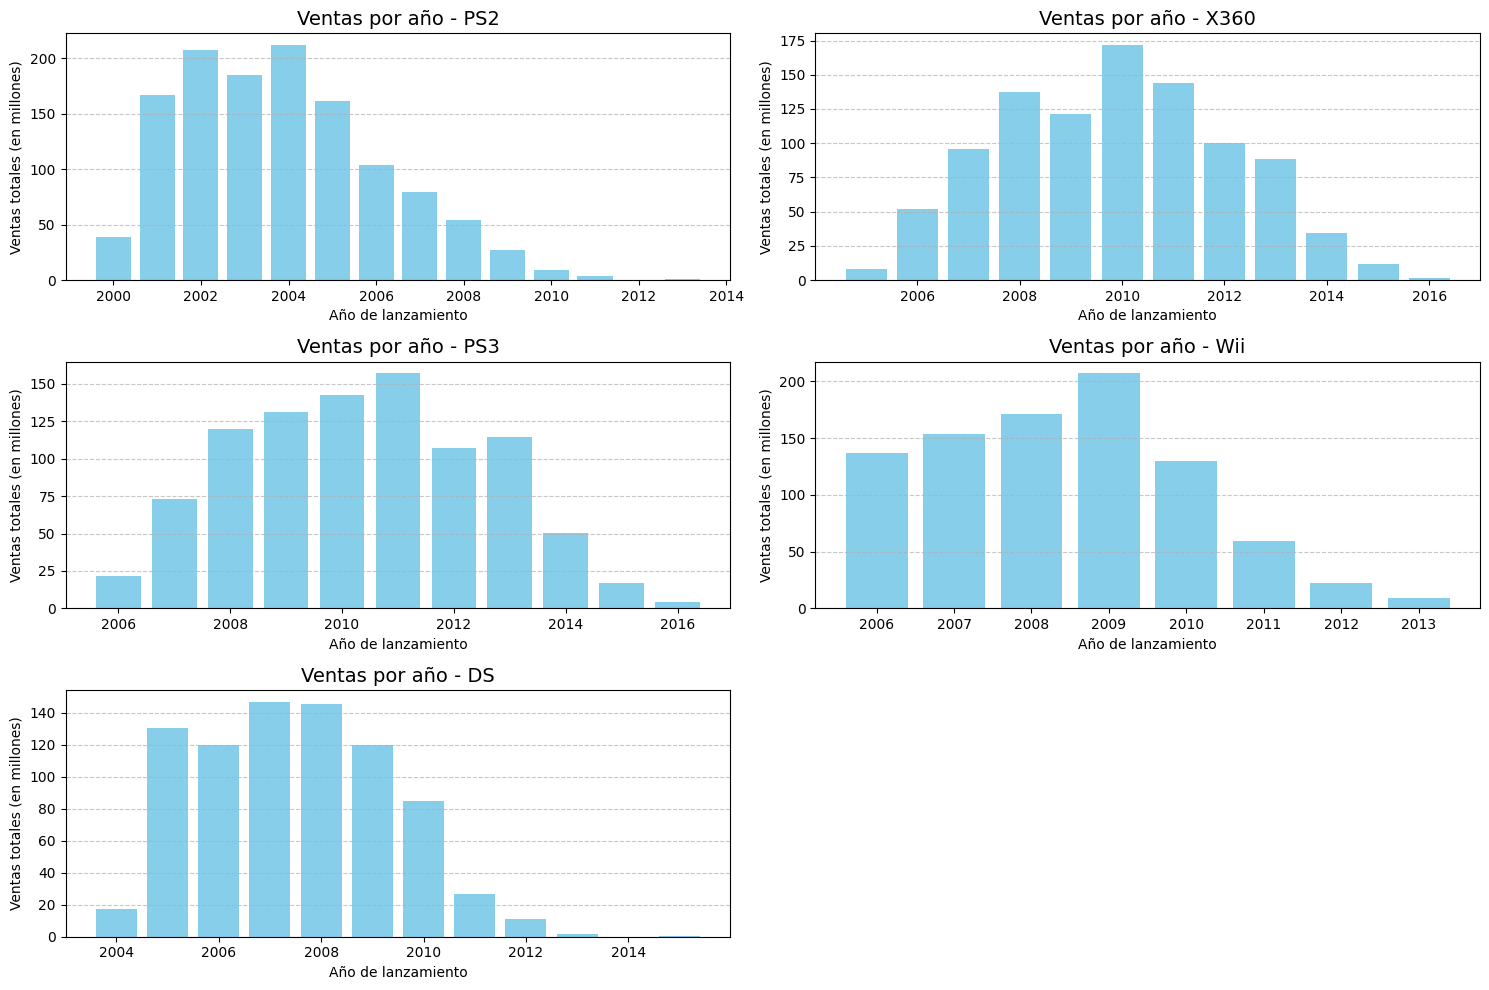



Plataformas antiguas sin ventas recientes:
 platform
DS     2015
PS2    2013
Wii    2013
Name: year_of_release, dtype: int64


Promedio de vida útil de una plataforma (en años): 10.4
           min   max  duration
platform                      
DS        2004  2015        11
PS2       2000  2013        13
PS3       2006  2016        10
Wii       2006  2013         7
X360      2005  2016        11




In [ ]:
# continuación del análisis con el data set filtrado 

#Identificar las plataformas con mayores ventas totales
# Calcular las ventas totales por plataforma
platform_sales = filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las plataformas con mayores ventas (por ejemplo, top 5)
top_platforms = platform_sales.head(5).index

# Mostrar resultados
print("Top 5 plataformas con mayores ventas:\n", platform_sales.head(5))

print()
print()

# Distribución de ventas por año (un gráfico por consola)
# Filtrar los datos para las plataformas principales
top_platforms_data = filtered_games[filtered_games['platform'].isin(top_platforms)]

# Graficar ventas por año para cada plataforma
plt.figure(figsize=(15, 10))

for i, platform in enumerate(top_platforms, 1):
    # Filtrar datos de la plataforma actual
    platform_data = top_platforms_data[top_platforms_data['platform'] == platform]
    
    # Agrupar por año y sumar ventas
    sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    
    # Crear subgráfico
    plt.subplot(3, 2, i)
    plt.bar(sales_by_year.index, sales_by_year.values, color='skyblue')
    plt.title(f'Ventas por año - {platform}', fontsize=14)
    plt.xlabel('Año de lanzamiento', fontsize=10)
    plt.ylabel('Ventas totales (en millones)', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print()
print()

# Identificar plataformas antiguas sin ventas recientes
# Obtener el último año con ventas para cada plataforma
last_sales_year = filtered_games.groupby('platform')['year_of_release'].max()

# Identificar plataformas sin ventas recientes (por ejemplo, ventas terminadas antes de 2016)
old_platforms = last_sales_year[last_sales_year < 2016]
print("Plataformas antiguas sin ventas recientes:\n", old_platforms)

print()
print()

# Analizar la duración de vida de las plataformas
# Calcular el primer y último año de ventas para cada plataforma
platform_lifetime = filtered_games.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calcular la duración de vida de cada plataforma
platform_lifetime['duration'] = platform_lifetime['max'] - platform_lifetime['min']

# Calcular estadísticas generales sobre la duración de vida
average_lifetime = platform_lifetime['duration'].mean()
print("Promedio de vida útil de una plataforma (en años):", average_lifetime)
print(platform_lifetime)

print()
print()

contestando a la pregunta 
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
sacando el promedio serían 10.4 años en transicionar.

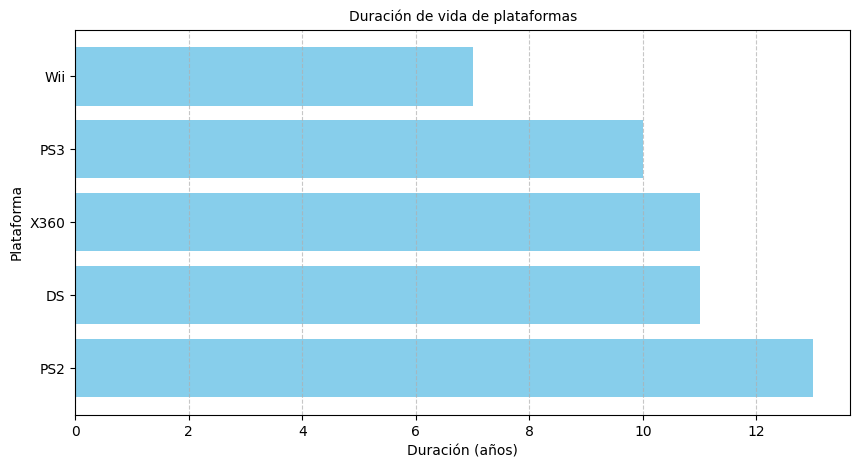

In [51]:
# Visualizar la duración de vida de las plataformas
plt.figure(figsize=(10, 5))
platform_lifetime.sort_values('min', inplace=True)
plt.barh(platform_lifetime.index, platform_lifetime['duration'], color='skyblue')
plt.title('Duración de vida de plataformas', fontsize=10)
plt.xlabel('Duración (años)', fontsize=10)
plt.ylabel('Plataforma', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1400x1000 with 0 Axes>

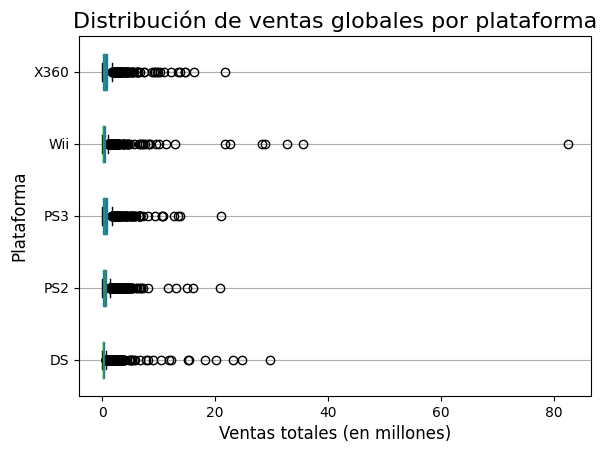



platform
DS      0.375656
PS2     0.580242
PS3     0.707398
Wii     0.692014
X360    0.772830
Name: total_sales, dtype: float64


Estadístico H de Kruskal-Wallis: 478.76636440127936
P-valor: 2.618840146024737e-102
Las diferencias en las ventas entre plataformas son estadísticamente significativas.


In [55]:

# Crear un diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(14, 10))
filtered_games.boxplot(
    column='total_sales',    # Ventas globales
    by='platform',           # Desglose por plataforma
    vert=False,              # Horizontal para mejor lectura
    patch_artist=True,       # Rellenar cajas con color
    grid=True
)

# Añadir títulos y etiquetas
plt.title('Distribución de ventas globales por plataforma', fontsize=16)
plt.suptitle('')  # Elimina el título automático
plt.xlabel('Ventas totales (en millones)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print()
print()

avg_sales_per_platform = filtered_games.groupby('platform')['total_sales'].mean()
print(avg_sales_per_platform)

print()
print()

from scipy.stats import kruskal

# Agrupar ventas por plataforma
platform_groups = [group['total_sales'].values for _, group in filtered_games.groupby('platform')]

# Realizar el test Kruskal-Wallis
stat, p_value = kruskal(*platform_groups)

print(f"Estadístico H de Kruskal-Wallis: {stat}")
print(f"P-valor: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Las diferencias en las ventas entre plataformas son estadísticamente significativas.")
else:
    print("No hay evidencia suficiente para concluir que las diferencias entre plataformas son significativas.")

Descripción de los hallazgos:
Distribución de las ventas por plataforma (boxplot):
Las plataformas muestran una alta variabilidad en las ventas globales, con un rango significativo de valores entre títulos de bajo desempeño y grandes éxitos.
Outliers (valores atípicos): Hay títulos en todas las plataformas principales que sobresalen con ventas excepcionalmente altas (por ejemplo, juegos con más de 80 millones en la Wii y Xbox 360).
Ventas promedio (mediana): Las medianas de ventas son relativamente bajas para todas las plataformas, lo que sugiere que la mayoría de los juegos no alcanzan grandes números de ventas y que unos pocos títulos dominan el mercado.

Test Kruskal-Wallis:
Estadístico H: 478.77, con un p-valor extremadamente bajo (≈0).
Interpretación: Las diferencias en las ventas entre plataformas son estadísticamente significativas, lo que significa que no todas las plataformas tienen el mismo patrón de ventas. Esto puede atribuirse a factores como el tamaño del mercado, el éxito de títulos exclusivos o el tiempo de vida útil de cada consola.

Ventas promedio por plataforma:
Xbox 360 (0.77) y Wii (0.69) tienen las mayores ventas promedio por juego, seguidas por PS3 (0.70) y PS2 (0.58). La Nintendo DS (0.38) tiene el promedio más bajo, posiblemente debido a su gran cantidad de títulos de menor escala en comparación con las demás plataformas.

PS2 - Correlación Critic Score vs Ventas: 0.39 (p-valor: 5.34e-49)
PS2 - Correlación User Score vs Ventas: 0.18 (p-valor: 2.99e-11)


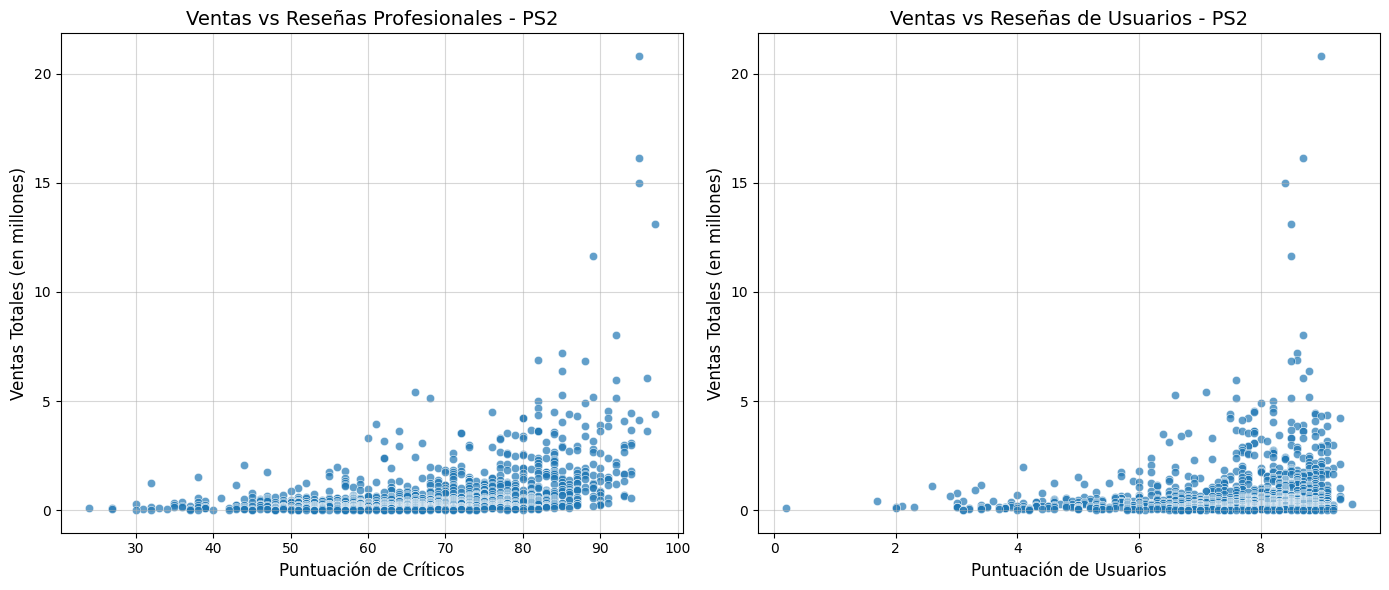

X360 - Correlación Critic Score vs Ventas: 0.39 (p-valor: 4.17e-35)
X360 - Correlación User Score vs Ventas: 0.11 (p-valor: 4.43e-04)


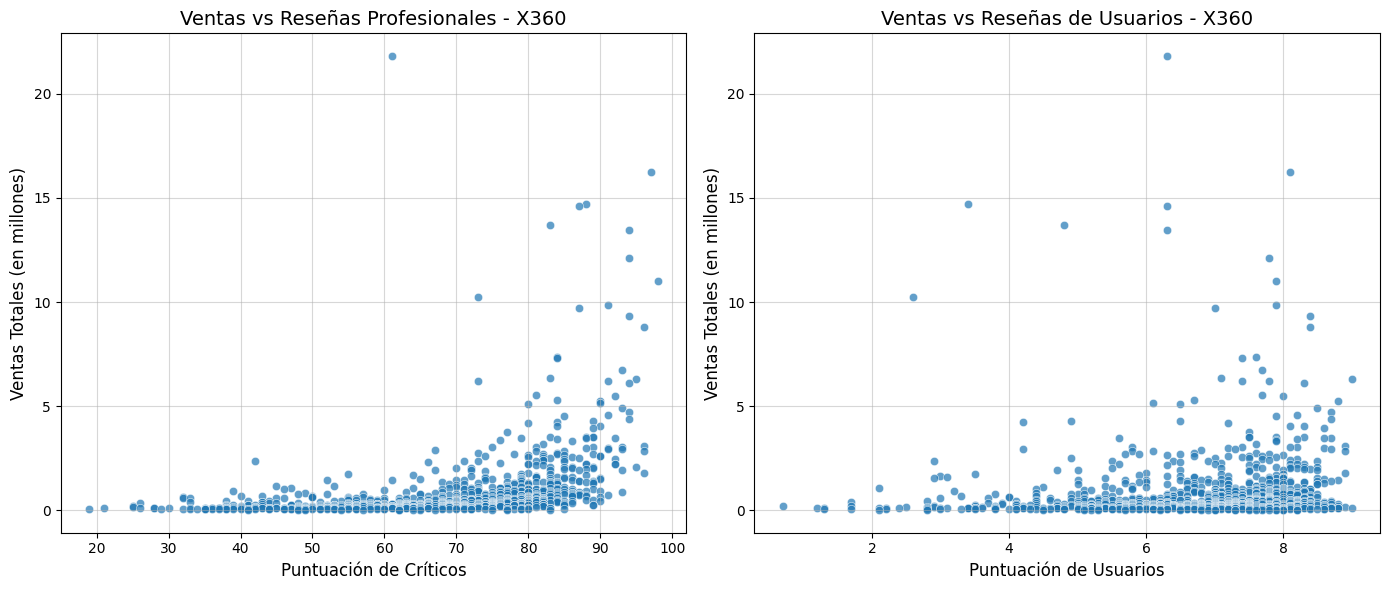

PS3 - Correlación Critic Score vs Ventas: 0.43 (p-valor: 1.53e-38)
PS3 - Correlación User Score vs Ventas: 0.12 (p-valor: 2.16e-04)


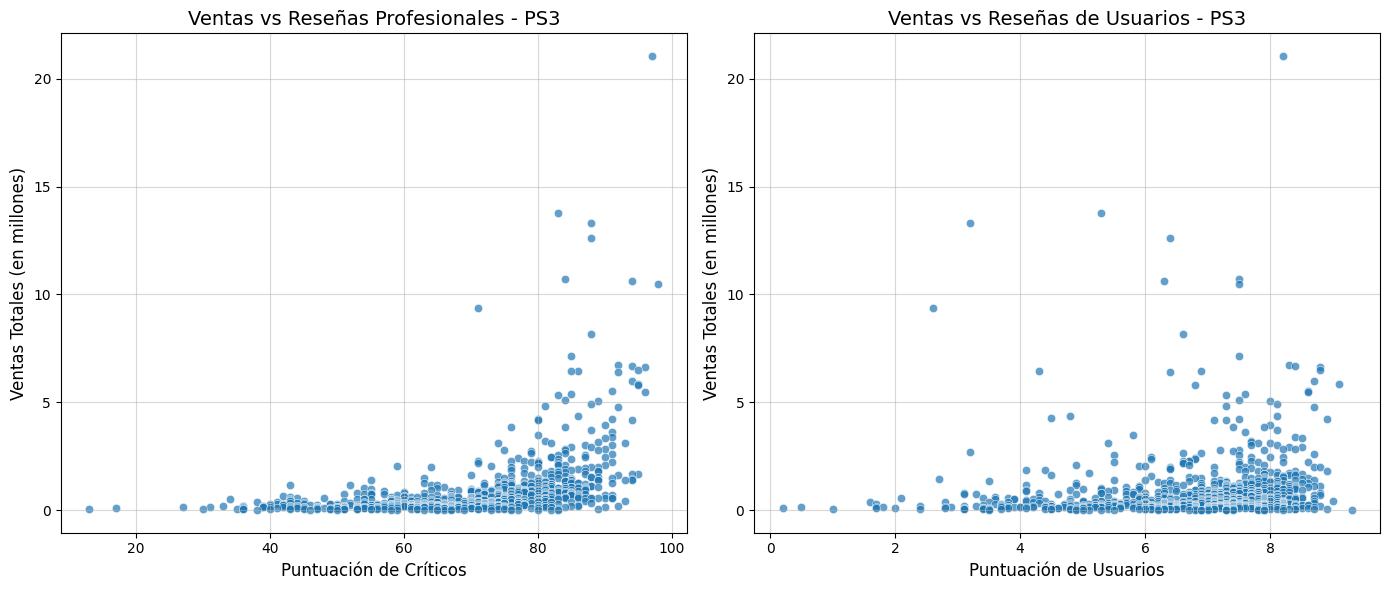

Wii - Correlación Critic Score vs Ventas: 0.18 (p-valor: 1.78e-05)
Wii - Correlación User Score vs Ventas: 0.09 (p-valor: 9.22e-03)


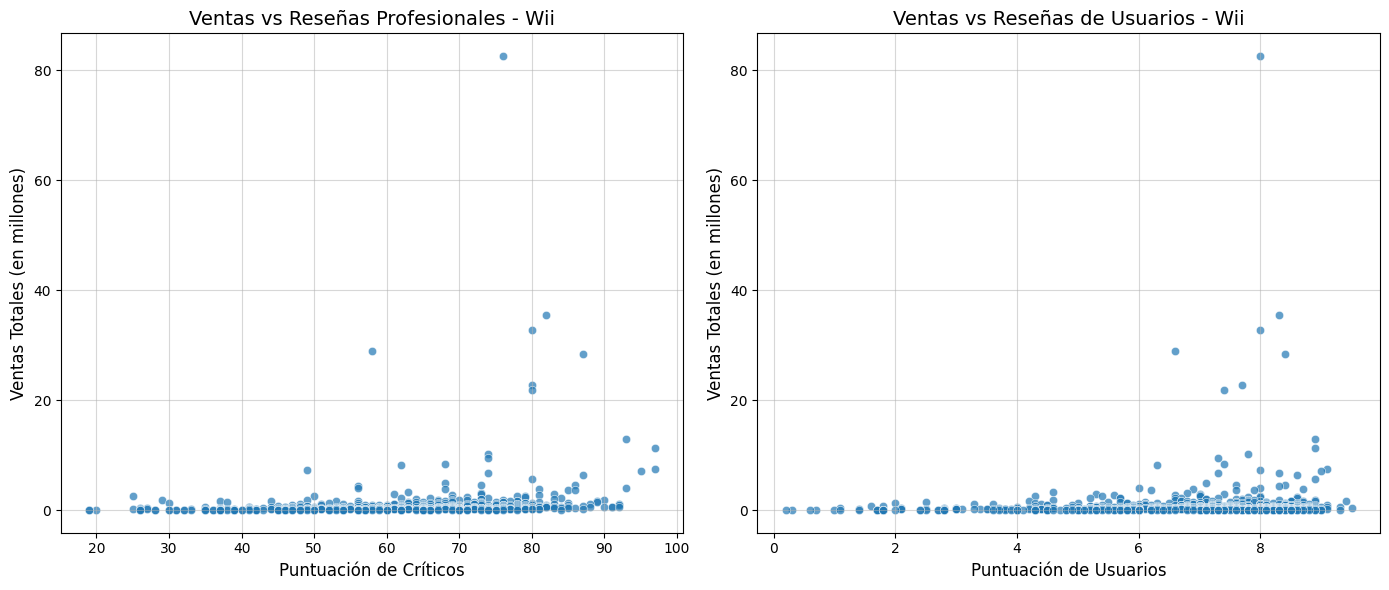

DS - Correlación Critic Score vs Ventas: 0.24 (p-valor: 1.53e-10)
DS - Correlación User Score vs Ventas: 0.10 (p-valor: 2.17e-03)


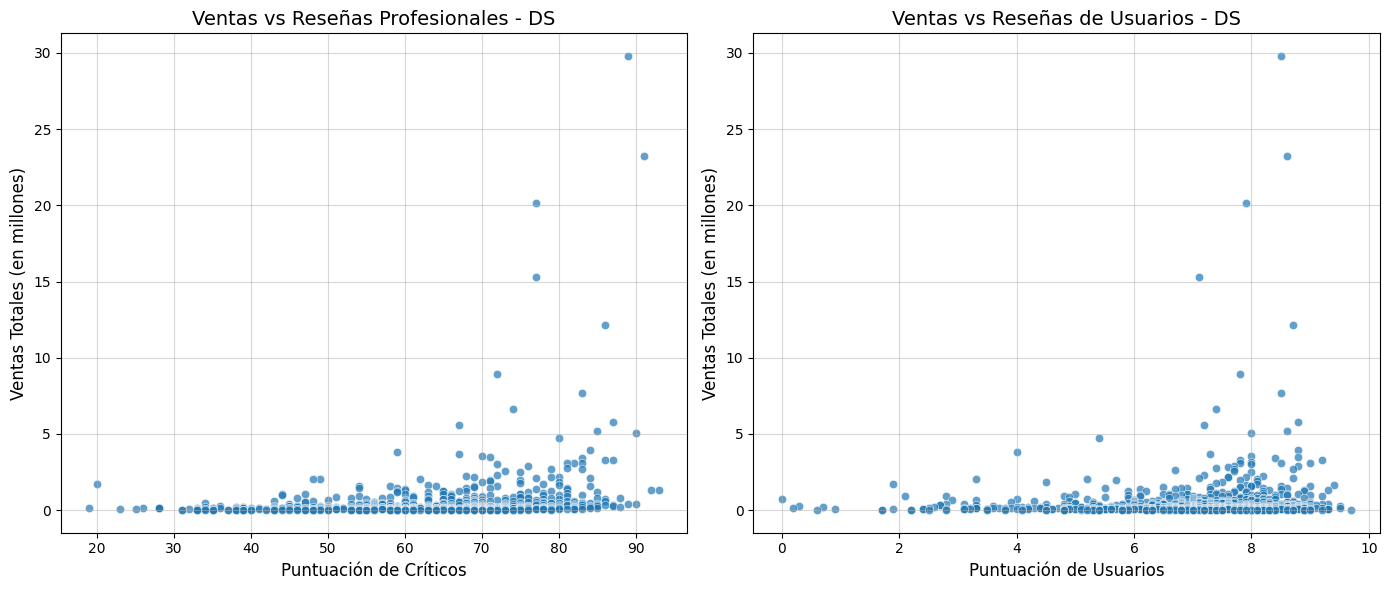

In [61]:


from scipy.stats import pearsonr

# Iterar sobre las plataformas del top 5
for platform in top_platforms:
    # Filtrar los datos para la consola actual
    platform_data = filtered_games[filtered_games['platform'] == platform]

    # Crear gráficos de dispersión para critic_score y total_sales
    plt.figure(figsize=(14, 6))

    # Dispersión: Critic Score vs Total Sales
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=platform_data['critic_score'], y=platform_data['total_sales'], alpha=0.7)
    plt.title(f'Ventas vs Reseñas Profesionales - {platform}', fontsize=14)
    plt.xlabel('Puntuación de Críticos', fontsize=12)
    plt.ylabel('Ventas Totales (en millones)', fontsize=12)
    plt.grid(alpha=0.5)

    # Filtrar filas sin nulos para ambas columnas
    valid_data_critic = platform_data.dropna(subset=['critic_score', 'total_sales'])

    # Calcular correlación para critic_score
    if len(valid_data_critic) > 1:  # Asegurarse de que haya al menos 2 puntos
        critic_corr, critic_pval = pearsonr(valid_data_critic['critic_score'], valid_data_critic['total_sales'])
        print(f"{platform} - Correlación Critic Score vs Ventas: {critic_corr:.2f} (p-valor: {critic_pval:.2e})")
    else:
        print(f"{platform} - No hay suficientes datos para calcular la correlación Critic Score vs Ventas.")

    # Dispersión: User Score vs Total Sales
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=platform_data['user_score'], y=platform_data['total_sales'], alpha=0.7)
    plt.title(f'Ventas vs Reseñas de Usuarios - {platform}', fontsize=14)
    plt.xlabel('Puntuación de Usuarios', fontsize=12)
    plt.ylabel('Ventas Totales (en millones)', fontsize=12)
    plt.grid(alpha=0.5)

    # Filtrar filas sin nulos para ambas columnas
    valid_data_user = platform_data.dropna(subset=['user_score', 'total_sales'])

    # Calcular correlación para user_score
    if len(valid_data_user) > 1:  # Asegurarse de que haya al menos 2 puntos
        user_corr, user_pval = pearsonr(valid_data_user['user_score'], valid_data_user['total_sales'])
        print(f"{platform} - Correlación User Score vs Ventas: {user_corr:.2f} (p-valor: {user_pval:.2e})")
    else:
        print(f"{platform} - No hay suficientes datos para calcular la correlación User Score vs Ventas.")

    plt.tight_layout()
    plt.show()

En general podemos ver que la critica de profecionales tiene correlaciones positivas más fuertes que las reseñas de los usaurios con las ventas, y por lo general entre más sube la calificación más suben las ventas, aunque hay casos en los que a pesar de no tener la mejor calificación esos juagos alcanzaron altos niveles de ventas, en xbox360 este fenómeno es especialmnte apreciable. 

   platform  total_sales
16      PS3        21.05
23     X360        16.27


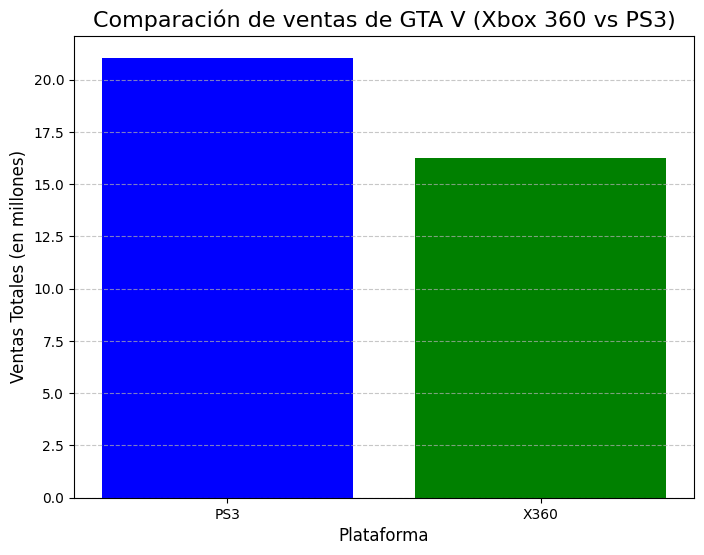



  platform              Juego Más Vendido  Ventas Totales
0       DS          New Super Mario Bros.           29.80
1      PS2  Grand Theft Auto: San Andreas           20.81
2      PS3             Grand Theft Auto V           21.05
3      Wii                     Wii Sports           82.54
4     X360             Kinect Adventures!           21.82


In [64]:
# comparar juegos en distintas plataformas

# Comparar las ventas de "Grand Theft Auto V" entre Xbox 360 y PS3

# Filtrar datos para GTA V en Xbox 360 y PS3
gta_v_data = filtered_games[(filtered_games['name'] == "Grand Theft Auto V") & 
                            (filtered_games['platform'].isin(['X360', 'PS3']))]

# Mostrar las ventas en ambas plataformas
print(gta_v_data[['platform', 'total_sales']])

# Graficar las ventas para comparar
plt.figure(figsize=(8, 6))
plt.bar(gta_v_data['platform'], gta_v_data['total_sales'], color=['blue', 'green'])
plt.title("Comparación de ventas de GTA V (Xbox 360 vs PS3)", fontsize=16)
plt.xlabel("Plataforma", fontsize=12)
plt.ylabel("Ventas Totales (en millones)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print()
print()

# Crear un DataFrame con el juego más vendido por cada plataforma
top_game_per_platform = (
    filtered_games[filtered_games['platform'].isin(top_platforms)]  # Filtrar solo las plataformas del top 5
    .groupby('platform')  # Agrupar por plataforma
    .apply(lambda group: group.loc[group['total_sales'].idxmax()])  # Seleccionar el juego con más ventas
    [['platform', 'name', 'total_sales']]  # Seleccionar las columnas relevantes
    .reset_index(drop=True)  # Resetear el índice para limpieza
)

# Renombrar las columnas para claridad
top_game_per_platform.rename(columns={'name': 'Juego Más Vendido', 'total_sales': 'Ventas Totales'}, inplace=True)

# Mostrar la tabla
print(top_game_per_platform)

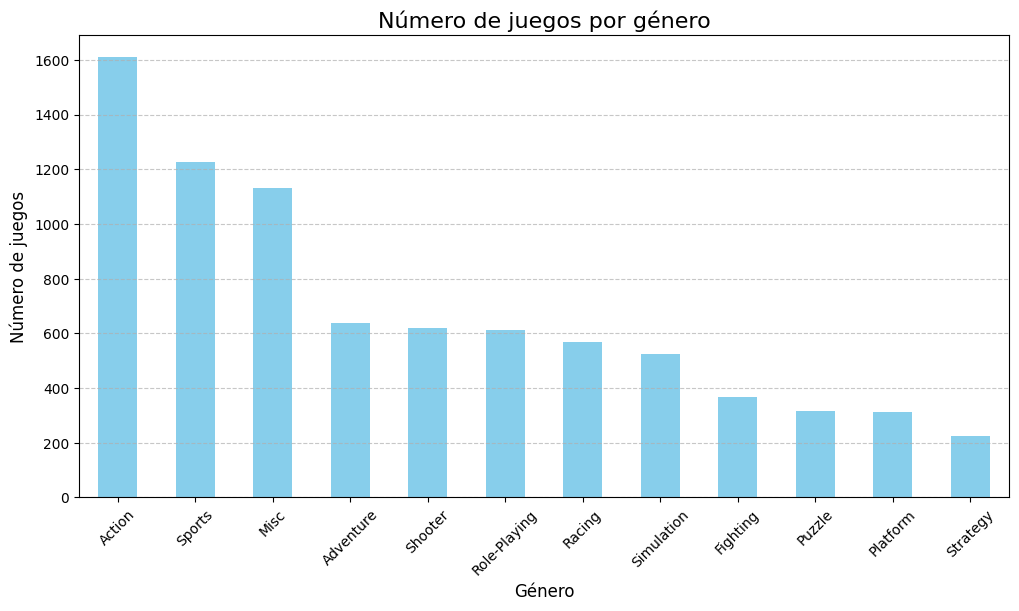

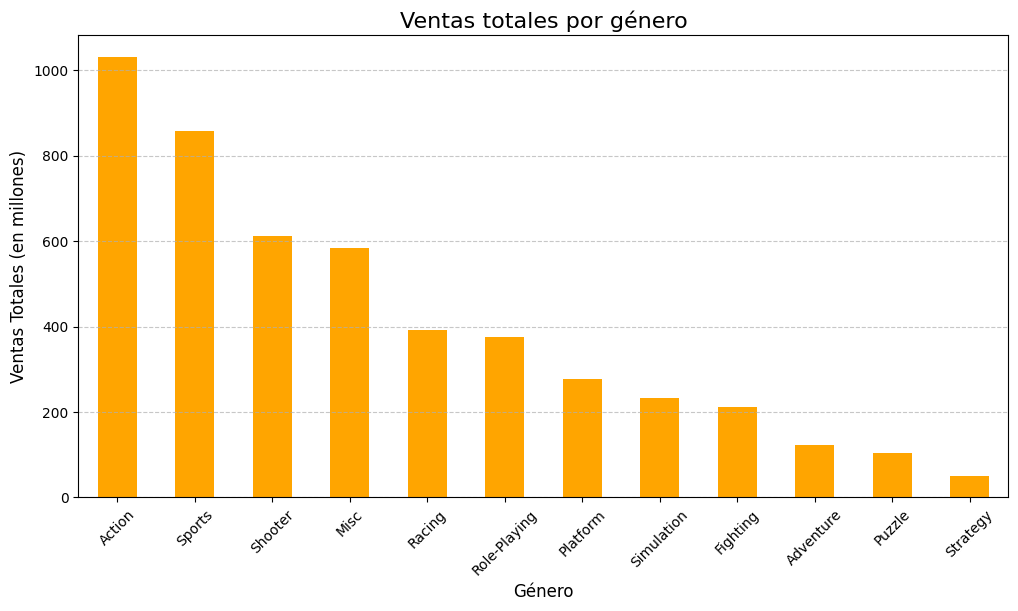

Número de juegos por género:
 Action          1609
Sports          1228
Misc            1133
Adventure        637
Shooter          620
Role-Playing     614
Racing           569
Simulation       526
Fighting         367
Puzzle           316
Platform         313
Strategy         226
Name: genre, dtype: int64

Ventas totales por género:
 genre
Action          1029.65
Sports           856.85
Shooter          612.68
Misc             584.43
Racing           390.97
Role-Playing     376.09
Platform         278.33
Simulation       232.21
Fighting         211.13
Adventure        121.93
Puzzle           104.71
Strategy          49.48
Name: total_sales, dtype: float64


In [65]:
# juegos por género
# Contar el número de juegos por género
games_per_genre = filtered_games['genre'].value_counts()

# Calcular las ventas totales por género
sales_per_genre = filtered_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualizar distribución de juegos por género
plt.figure(figsize=(12, 6))
games_per_genre.plot(kind='bar', color='skyblue')
plt.title('Número de juegos por género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de juegos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualizar ventas totales por género
plt.figure(figsize=(12, 6))
sales_per_genre.plot(kind='bar', color='orange')
plt.title('Ventas totales por género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar las tablas para análisis
print("Número de juegos por género:\n", games_per_genre)
print("\nVentas totales por género:\n", sales_per_genre)

Observaciones generales:
Los géneros más populares (en cantidad de juegos) tienden a ser también los más rentables, como es el caso de Acción y Deportes.
Géneros de nicho como Puzzle y Estrategia parecen tener un mercado limitado, tanto en cantidad como en aceptación.
Géneros como Shooter y RPG demuestran que incluso con menos títulos, pueden ser consistentemente exitosos debido a la calidad o el impacto de sus franquicias.

Géneros más populares (en número de juegos):
Acción, Deportes, y Miscellaneous (Misceláneo) son los géneros más populares en cuanto a cantidad de títulos.
Estos géneros suelen ser más fáciles de producir o atraer a un público amplio, lo que puede explicar el gran número de lanzamientos.
Por ejemplo, Acción tiene más de 1600 títulos, lo que indica su predominio en la industria.
Los géneros con menos títulos incluyen Puzzle, Plataformas, y Estrategia, lo que podría indicar un nicho más limitado o menor interés por parte de desarrolladores.

Géneros más rentables (en ventas totales):
Acción y Deportes dominan también en ventas totales, lo que confirma que no solo son populares en cantidad, sino también en aceptación del público.
Acción alcanza ventas totales cercanas a 1000 millones de unidades, siendo el género más rentable.
Shooter (Disparos), aunque tiene menos juegos comparado con Acción, se encuentra entre los géneros más rentables. Esto podría atribuirse al éxito de franquicias específicas como Call of Duty o Halo.
Puzzle y Estrategia tienen ventas totales significativamente bajas, lo que podría reflejar una menor audiencia o títulos con menor éxito en promedio.

Generalizaciones sobre géneros con ventas altas:
Géneros como Acción, Deportes, y Shooter logran combinar una gran cantidad de títulos con un alto nivel de ventas. Esto sugiere que estos géneros tienen una base de consumidores sólida y consistente.
Role-Playing (RPG), aunque menos popular en número de títulos, tiene ventas relativamente altas. Esto indica que los juegos de este género tienden a ser más exitosos individualmente, posiblemente debido a la dedicación de sus audiencias.

Generalizaciones sobre géneros con ventas bajas:
Estrategia, Puzzle, y Simulación tienen menos ventas totales a pesar de contar con una cantidad decente de juegos. Esto sugiere que, en promedio, los juegos en estos géneros venden menos por título.
Estos géneros suelen atraer audiencias más de nicho, lo que podría explicar su menor éxito global en comparación con géneros como Acción o Shooter.

## Crear un perfil de usaurio para cada region

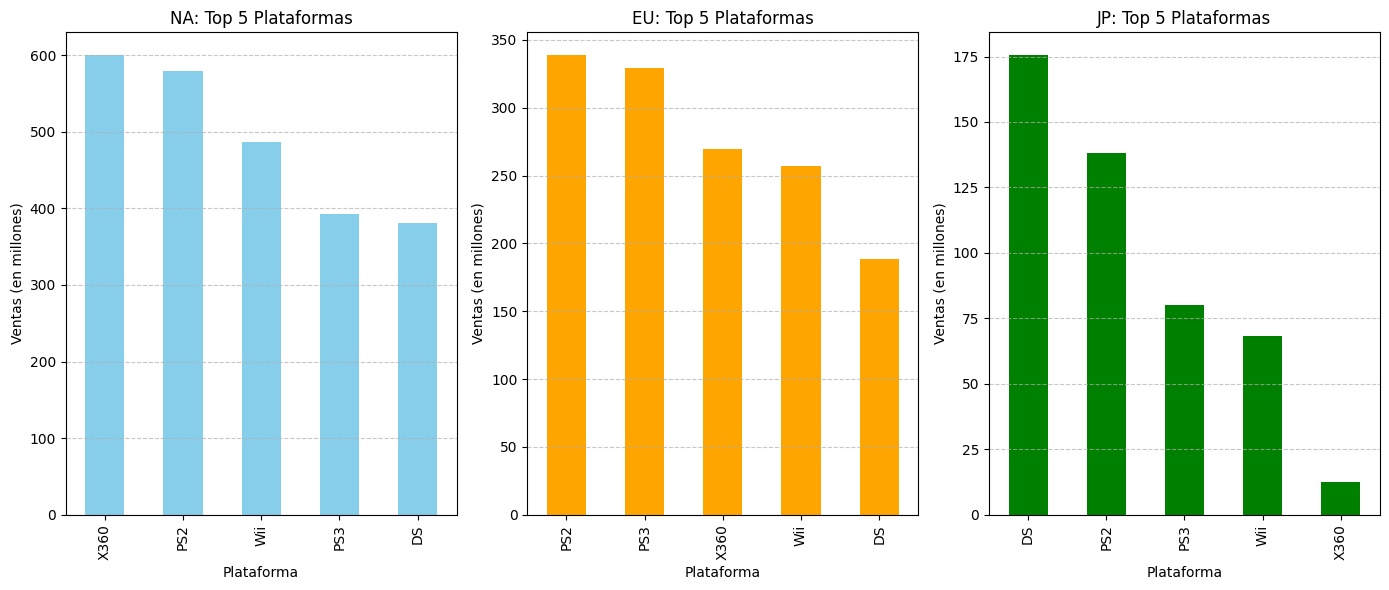

In [66]:
# Crea un perfil de usuario para cada región

# Paso 1: Las cinco plataformas principales por región
# Calcular ventas totales por plataforma en cada región
platform_sales_na = filtered_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = filtered_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = filtered_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Crear gráficos comparativos
plt.figure(figsize=(14, 6))

# NA
plt.subplot(1, 3, 1)
platform_sales_na.plot(kind='bar', color='skyblue', title='NA: Top 5 Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# EU
plt.subplot(1, 3, 2)
platform_sales_eu.plot(kind='bar', color='orange', title='EU: Top 5 Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# JP
plt.subplot(1, 3, 3)
platform_sales_jp.plot(kind='bar', color='green', title='JP: Top 5 Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

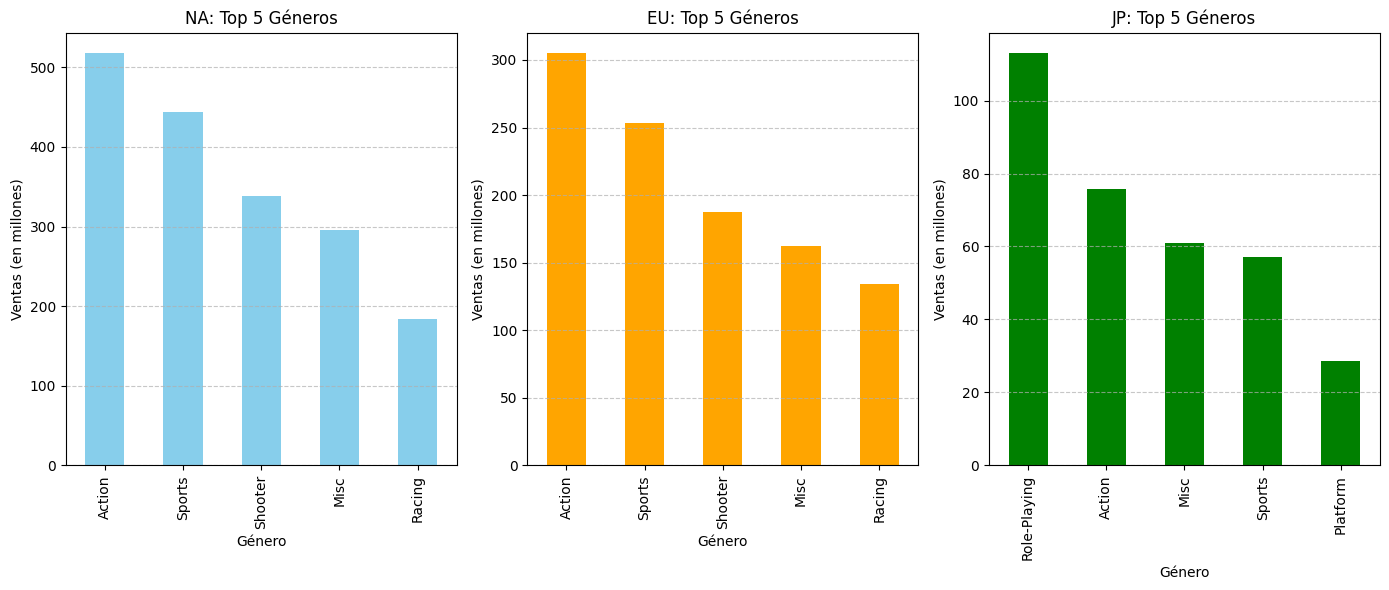

In [67]:
# Paso 2: Los cinco géneros principales por región

genre_sales_na = filtered_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = filtered_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = filtered_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Crear gráficos comparativos
plt.figure(figsize=(14, 6))

# NA
plt.subplot(1, 3, 1)
genre_sales_na.plot(kind='bar', color='skyblue', title='NA: Top 5 Géneros')
plt.xlabel('Género')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# EU
plt.subplot(1, 3, 2)
genre_sales_eu.plot(kind='bar', color='orange', title='EU: Top 5 Géneros')
plt.xlabel('Género')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# JP
plt.subplot(1, 3, 3)
genre_sales_jp.plot(kind='bar', color='green', title='JP: Top 5 Géneros')
plt.xlabel('Género')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

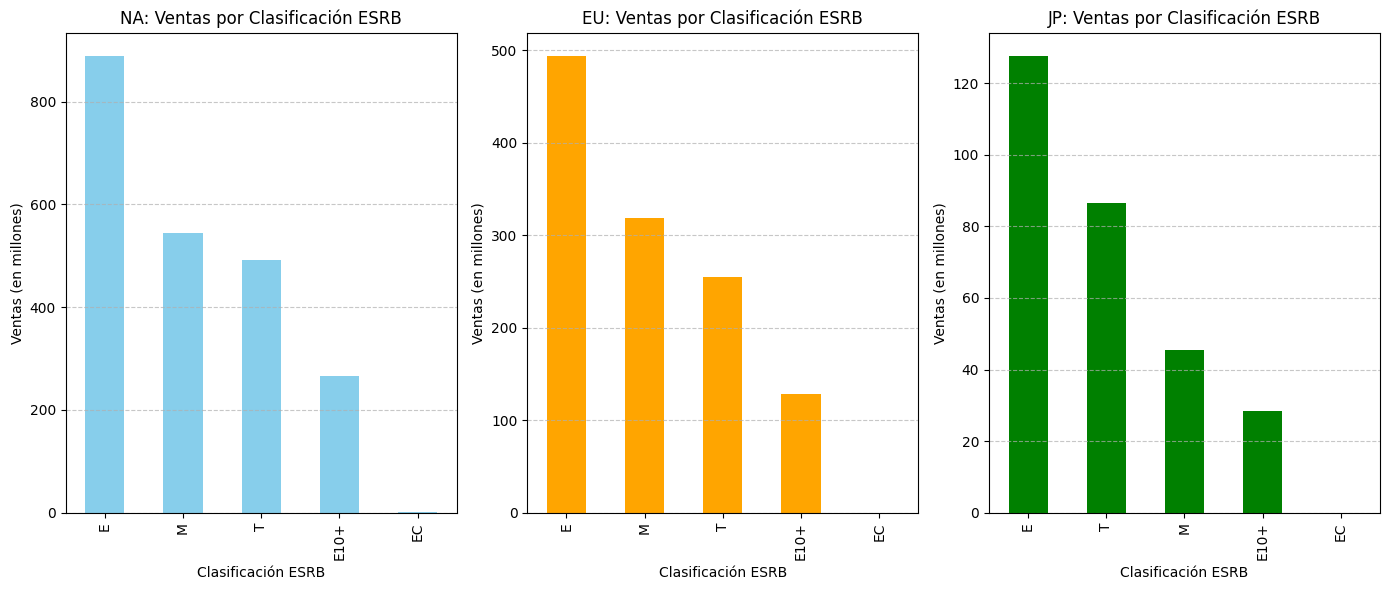

In [68]:
# Paso 3: Impacto de las clasificaciones de ESRB en las ventas

# Calcular ventas totales por clasificación ESRB en cada región
esrb_sales_na = filtered_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = filtered_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = filtered_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Crear gráficos comparativos
plt.figure(figsize=(14, 6))

# NA
plt.subplot(1, 3, 1)
esrb_sales_na.plot(kind='bar', color='skyblue', title='NA: Ventas por Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# EU
plt.subplot(1, 3, 2)
esrb_sales_eu.plot(kind='bar', color='orange', title='EU: Ventas por Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# JP
plt.subplot(1, 3, 3)
esrb_sales_jp.plot(kind='bar', color='green', title='JP: Ventas por Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (en millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

1. Norteamérica (NA):
Plataformas principales:
Usuarios prefieren plataformas como Xbox 360, PS2 y Wii.
La Xbox 360 domina el mercado, posiblemente debido a su popularidad entre los jugadores de Shooters y títulos exclusivos como Halo.
Géneros principales:
Acción, Deportes y Shooter son los géneros más populares.
Los Shooters tienen un lugar destacado, probablemente impulsados por franquicias como Call of Duty y Halo.
Clasificación ESRB:
La mayoría de los juegos vendidos tienen clasificación E (Everyone), seguida de M (Mature).
Esto indica que el mercado es amplio, desde familias y niños hasta jugadores adultos interesados en contenido más violento o maduro.
Perfil de usuario:
Género amplio: Incluye tanto jugadores casuales como hardcore.
Intereses: Juegos de deportes y acción con mecánicas rápidas y multijugador competitivo.
Demografía: Familias (para juegos E) y jugadores jóvenes/adultos (para juegos M y Shooters).

2. Europa (EU):
Plataformas principales:
PS2 y PS3 lideran las ventas, seguidas de Xbox 360 y Wii.
Las consolas PlayStation tienen una fuerte presencia, posiblemente debido a la popularidad de franquicias como FIFA y Gran Turismo.
Géneros principales:
Acción, Deportes y Shooter son los géneros dominantes, similares a NA.
Los juegos de deportes (especialmente fútbol) tienen un gran impacto en esta región, liderados por FIFA.
Clasificación ESRB:
Los juegos con clasificación E (Everyone) son los más vendidos, seguidos por M (Mature).
Esto refleja un mercado similar al de NA, pero con una mayor inclinación hacia juegos deportivos para todas las edades.
Perfil de usuario:
Género predominante: Jugadores interesados en deportes, especialmente fútbol.
Intereses: Títulos de acción, deportes y shooters.
Demografía: Familias (para juegos E) y jóvenes adultos fanáticos de deportes y juegos competitivos.

3. Japón (JP):
Plataformas principales:
DS y PS2 dominan las ventas, con una fuerte preferencia por consolas portátiles como la DS.
Las consolas domésticas como PS3 y Wii están presentes, pero con menor relevancia que en NA y EU.
Géneros principales:
Role-Playing Games (RPGs) son el género más popular, seguido de Acción y Misceláneo.
La preferencia por RPGs refleja el éxito de franquicias locales como Final Fantasy y Dragon Quest.
Clasificación ESRB:
Los juegos con clasificación E (Everyone) son los más vendidos, seguidos por T (Teen) y M (Mature).
Esto sugiere que los jugadores japoneses prefieren juegos accesibles para diferentes edades, pero también tienen interés en contenido más maduro.
Perfil de usuario:
Género predominante: Jugadores interesados en RPGs y títulos con narrativas profundas.
Intereses: Juegos portátiles para jugar en movimiento, franquicias locales con una fuerte narrativa y estética anime.
Demografía: Familias y jugadores jóvenes/adultos interesados en historias complejas.

Comparación general:
Plataformas:
NA y EU prefieren consolas domésticas como Xbox y PlayStation, mientras que JP se inclina hacia consolas portátiles como la DS.
Géneros:
NA y EU tienen una fuerte inclinación por Acción, Deportes y Shooters.
JP destaca en RPGs, reflejando una preferencia por títulos narrativos.
Clasificación ESRB:
En todas las regiones, los juegos E (Everyone) son los más populares, pero NA y EU tienen una mayor proporción de ventas en juegos M (Mature) comparado con JP.


## Pruebas de hipótesis

Hipótesis: Calificaciones promedio de usuarios para Xbox One y PC
Formulación de las hipótesis:
Hipótesis nula (H₀): Las calificaciones promedio de usuarios para Xbox One y PC son iguales.
Hipótesis alternativa (Hₐ): Las calificaciones promedio de usuarios para Xbox One y PC son diferentes.
Esta es una prueba de dos colas porque buscamos diferencias en cualquier dirección, no solo si una plataforma tiene mejores calificaciones.

Criterio para probar la hipótesis:
Tipo de prueba:

Como estamos comparando dos grupos independientes (Xbox One y PC), utilizaremos una prueba t de Student para muestras independientes.
Este test asume que las muestras son normales. Si esto no se cumple, utilizaremos una prueba no paramétrica como el Mann-Whitney U.

Preparación de datos:

Filtrar las calificaciones de usuarios para las plataformas Xbox One y PC.
Remover valores nulos en la columna user_score.


In [77]:
# Ajustar la columna 'user_score'
games['user_score'] = games['user_score'].replace('tbd', None).astype(float)

# Verificar el resultado
print(games['user_score'].head())

from scipy.stats import mannwhitneyu

# Filtrar datos para Xbox One y PC
xbox_one_scores = games[games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games[games['platform'] == 'PC']['user_score'].dropna()

# Verificar que ambas muestras tengan datos
if xbox_one_scores.size > 0 and pc_scores.size > 0:
    # Realizar prueba de Mann-Whitney U
    u_stat, p_value = mannwhitneyu(xbox_one_scores, pc_scores, alternative='two-sided')

    # Resultados
    print("=== Prueba: Xbox One vs PC ===")
    print(f"Estadístico U: {u_stat:.2f}")
    print(f"P-valor: {p_value:.4f}")

    # Interpretación
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos H₀: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
    else:
        print("No podemos rechazar H₀: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")
else:
    print("Una de las muestras no tiene datos suficientes para realizar la prueba.")
    
print()
print()

# Calcular promedios para Xbox One y PC
xbox_one_avg = xbox_one_scores.mean()
pc_avg = pc_scores.mean()

print("\n=== Promedios: Xbox One vs PC ===")
print(f"Promedio de calificaciones para Xbox One: {xbox_one_avg:.2f}")
print(f"Promedio de calificaciones para PC: {pc_avg:.2f}")

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64
=== Prueba: Xbox One vs PC ===
Estadístico U: 52765.50
P-valor: 0.0000
Rechazamos H₀: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.



=== Promedios: Xbox One vs PC ===
Promedio de calificaciones para Xbox One: 6.52
Promedio de calificaciones para PC: 7.06


2. Hipótesis: Calificaciones promedio para géneros de Acción y Deportes
Formulación de las hipótesis:
Hipótesis nula (H₀): Las calificaciones promedio de los géneros de Acción y Deportes son iguales.
Hipótesis alternativa (Hₐ): Las calificaciones promedio de los géneros de Acción y Deportes son diferentes.
También es una prueba de dos colas porque estamos buscando diferencias en cualquier dirección.

Criterio para probar la hipótesis:
Tipo de prueba:
Usaremos la prueba t de Student o, si no se cumplen los supuestos de normalidad, la prueba de Mann-Whitney U.
Preparación de datos:
Filtrar las calificaciones de usuarios para los géneros Acción y Deportes.
Remover valores nulos en la columna user_score.


In [79]:
# Filtrar datos para Acción y Deportes
action_scores = games[games['genre'] == 'Action']['user_score'].dropna()
sports_scores = games[games['genre'] == 'Sports']['user_score'].dropna()

# Verificar que ambas muestras tengan datos
if action_scores.size > 0 and sports_scores.size > 0:
    # Realizar prueba de Mann-Whitney U
    u_stat, p_value = mannwhitneyu(action_scores, sports_scores, alternative='two-sided')

    # Resultados
    print("\n=== Prueba: Acción vs Deportes ===")
    print(f"Estadístico U: {u_stat:.2f}")
    print(f"P-valor: {p_value:.4f}")

    # Interpretación
    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos H₀: Las calificaciones promedio para los géneros de Acción y Deportes son diferentes.")
    else:
        print("No podemos rechazar H₀: Las calificaciones promedio para los géneros de Acción y Deportes son iguales.")
else:
    print("Una de las muestras no tiene datos suficientes para realizar la prueba.")
    
print()
print()

# Calcular promedios para Acción y Deportes
action_avg = action_scores.mean()
sports_avg = sports_scores.mean()

print("\n=== Promedios: Acción vs Deportes ===")
print(f"Promedio de calificaciones para Acción: {action_avg:.2f}")
print(f"Promedio de calificaciones para Deportes: {sports_avg:.2f}")


=== Prueba: Acción vs Deportes ===
Estadístico U: 1340007.50
P-valor: 0.6183
No podemos rechazar H₀: Las calificaciones promedio para los géneros de Acción y Deportes son iguales.



=== Promedios: Acción vs Deportes ===
Promedio de calificaciones para Acción: 7.05
Promedio de calificaciones para Deportes: 6.95


## Conclusión General 

Conclusión General: Patrones para el Éxito de Videojuegos - Planificación para 2017
El análisis realizado sobre el mercado global de videojuegos revela patrones clave que pueden ser utilizados para identificar juegos prometedores y planificar campañas publicitarias efectivas. Aquí presentamos los hallazgos más relevantes:

1. Plataformas: Dominio y variación por región
Norteamérica: Las plataformas más populares son Xbox 360, PS2 y Wii, dominando las ventas gracias a títulos exclusivos y géneros como Shooter y Deportes. Estas plataformas tienen una base de usuarios sólida y son ideales para promocionar juegos de acción y deportes.
Europa: La PS2 y PS3 lideran, con una inclinación hacia juegos de acción y deportes como FIFA, lo que indica un fuerte mercado para títulos deportivos con mecánicas realistas y multijugador competitivo.
Japón: La Nintendo DS domina, seguida de PS2, reflejando una preferencia por consolas portátiles y géneros narrativos como RPGs (Final Fantasy, Dragon Quest). Este mercado valora historias profundas y juegos con una estética única.

2. Géneros: Éxitos globales y diferencias regionales
Acción, Deportes y Shooter son los géneros más rentables globalmente, indicando un amplio atractivo entre los consumidores. Estos géneros son apuestas seguras para campañas publicitarias en Norteamérica y Europa.
En Japón, los RPGs son los más populares, lo que resalta la importancia de adaptar campañas para satisfacer las preferencias locales.
Los géneros Puzzle y Estrategia, aunque de nicho, pueden ser explotados con estrategias dirigidas hacia audiencias específicas.

3. Clasificaciones ESRB: Diferencias culturales
Clasificación E (Everyone): Lidera las ventas en todas las regiones, lo que indica un atractivo universal para juegos familiares y accesibles.
Clasificación M (Mature): Popular en Norteamérica y Europa, lo que sugiere que los jugadores en estas regiones valoran contenido más violento y maduro.
En Japón, aunque E también domina, T (Teen) tiene un peso mayor que en otras regiones, reflejando una audiencia joven pero madura.

4. Impacto de calificaciones de usuarios y críticos
Las calificaciones de los críticos tienen una correlación positiva moderada con las ventas, especialmente en géneros como Acción y Shooter. Esto indica que una buena recepción crítica puede impulsar las ventas.
Las calificaciones de los usuarios, aunque menos correlacionadas con las ventas, son importantes para juegos con una base de jugadores activa, como RPGs y Deportes. Esto puede influir en campañas que fomenten reseñas positivas.

5. Insights de las pruebas de hipótesis
Los juegos de PC tienen una calificación promedio más alta que los de Xbox One. Esto podría reflejar una mayor satisfacción de los usuarios con la experiencia de juego en PC, posiblemente debido a factores como mejor rendimiento, gráficos superiores o una mayor personalización.

Las calificaciones promedio de los géneros de Acción y Deportes son muy similares, lo que sugiere que ambos géneros tienen una recepción equivalente entre los usuarios. Esto indica que ambos géneros pueden considerarse como opciones competitivas para campañas publicitarias globales.

Plataformas clave:

Norteamérica y Europa: Focalizar campañas en consolas como Xbox 360, PS3 y Wii para géneros de acción, deportes y shooters.
Japón: Enfatizar en la Nintendo DS, promoviendo RPGs y títulos narrativos adaptados a las preferencias locales.
Géneros prioritarios:

Priorizar géneros globales como Acción, Deportes y Shooter en campañas masivas.
Enfocar esfuerzos en RPGs para campañas específicas en Japón.
Campañas adaptadas por región:

Crear campañas centradas en juegos clasificados como E para llegar a audiencias amplias.
En Norteamérica y Europa, resaltar juegos M en segmentos de mercado más adultos.
En Japón, promocionar títulos T y E con un enfoque narrativo.
Estrategia basada en calificaciones:

Resaltar reseñas positivas de críticos en campañas publicitarias, especialmente para juegos de acción y shooters.
Fomentar la interacción de los usuarios con calificaciones en línea para reforzar la percepción de calidad en géneros como Deportes y RPGs.
Conclusión final:
Los datos analizados muestran que el éxito de un juego depende de una combinación de factores: plataforma, género, clasificación ESRB y recepción crítica/usuario. Para 2017, las campañas deben adaptarse a las preferencias regionales mientras se capitalizan géneros globalmente populares como Acción y Deportes. Al planificar estratégicamente estas campañas, la tienda online Ice puede posicionarse para maximizar ventas y capturar mercados clave en todo el mundo.